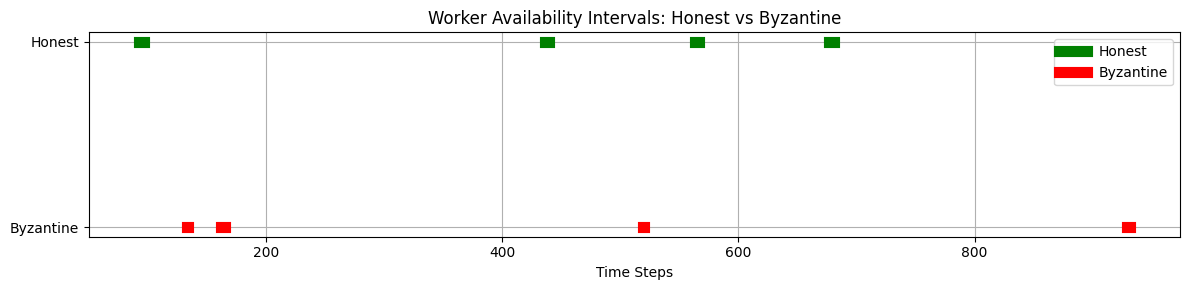

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Helper to merge intervals
def merge_intervals(intervals):
    if not intervals:
        return []
    intervals.sort()
    merged = [intervals[0]]
    for current in intervals[1:]:
        last = merged[-1]
        if current[0] <= last[1]:
            merged[-1] = (last[0], max(last[1], current[1]))
        else:
            merged.append(current)
    return merged

# Honest worker availability
def generate_gaussian_availability(total_time_steps, std_dev_ratio=0.1, min_processing_time=3):
    peak_means = [0.25, 0.5, 0.75]
    std_dev = int(std_dev_ratio * total_time_steps)
    availability_periods = []

    for mean_ratio in peak_means:
        mean = int(mean_ratio * total_time_steps)
        intensity = random.choice([1, 2, 3])
        for _ in range(intensity):
            start_time = int(np.random.normal(loc=mean, scale=std_dev))
            start_time = max(0, min(start_time, total_time_steps - min_processing_time))
            max_extra = 2 * intensity
            duration = random.randint(min_processing_time, min(min_processing_time + max_extra, total_time_steps - start_time))
            end_time = start_time + duration
            availability_periods.append((start_time, end_time))

    return merge_intervals(availability_periods)

# Byzantine worker availability
def generate_gaussian_byzantine_availability(total_time_steps, std_dev_ratio=0.08, min_processing_time=2):
    off_peak_means = [0.1, 0.375, 0.9]
    std_dev = int(std_dev_ratio * total_time_steps)
    availability_periods = []

    for mean_ratio in off_peak_means:
        mean = int(mean_ratio * total_time_steps)
        intensity = random.choice([1, 1, 2])
        for _ in range(intensity):
            start_time = int(np.random.normal(loc=mean, scale=std_dev))
            start_time = max(0, min(start_time, total_time_steps - min_processing_time))
            max_extra = 1 * intensity
            duration = random.randint(1, min(min_processing_time + max_extra, total_time_steps - start_time))
            end_time = start_time + duration
            availability_periods.append((start_time, end_time))

    return merge_intervals(availability_periods)

# Generate availability for visualization
total_time_steps = 1000
honest_avail = generate_gaussian_availability(total_time_steps)
byzantine_avail = generate_gaussian_byzantine_availability(total_time_steps)

# Plot
plt.figure(figsize=(12, 3))
for start, end in honest_avail:
    plt.plot([start, end], [1, 1], color='green', lw=8, label='Honest' if start == honest_avail[0][0] else "")
for start, end in byzantine_avail:
    plt.plot([start, end], [0.5, 0.5], color='red', lw=8, label='Byzantine' if start == byzantine_avail[0][0] else "")

plt.yticks([0.5, 1], ['Byzantine', 'Honest'])
plt.xlabel("Time Steps")
plt.title("Worker Availability Intervals: Honest vs Byzantine")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
